# Volume 4: Heat Flow
    <Name>
    <Class>
    <Date>

In [158]:
# Import desired imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from matplotlib.animation import FuncAnimation
from scipy.sparse import diags
import scipy.sparse as sp

In [ ]:
%matplotlib inline

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = 0.05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{0.2 - |x-0.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time.
Plot the approximation at $t=0, t=0.4$, and $t=1$.

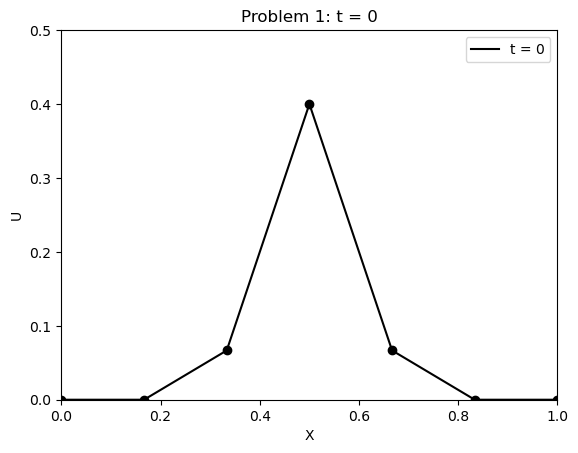

In [162]:
# Set constants 
v = 0.05
k = 1/10
h = 1/6
n = 6

# Initialize lambda and the U_m matrix
lambd = (v*k)/(h**2)
U_m = []

# Set x and t linspaces
X = np.linspace(0,1,7)
T = np.linspace(0,1,11)

# Define initial condition function
f1 = lambda x: 2 * max(0.2 - np.abs(x-0.5), 0)

# Find initial U_0 matrix
U_0 = np.array([f1(x) for x in X])
U_m.append(U_0)

# Plot when t = 0
plt.plot(X, U_0, color = 'black', label = 't = 0')
plt.scatter(X, U_0, color = 'black')
plt.title('Problem 1: t = 0')
plt.xlabel('X')
plt.ylim([0,0.5])
plt.ylabel('U')
plt.xlim([0,1])
plt.legend()
plt.show()

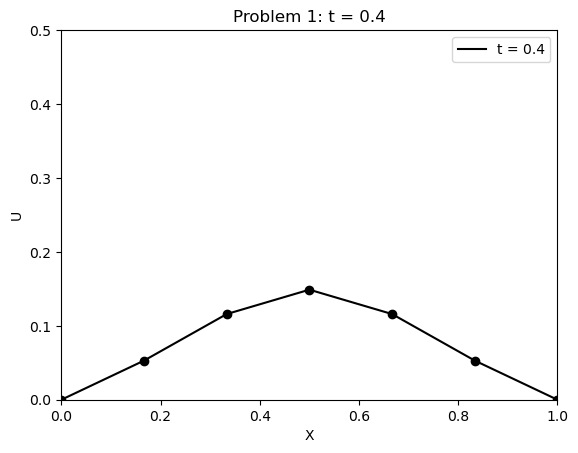

In [163]:
# Define diagonals for A
main_diagonal = [1] + [1-2*lambd for num in range(n-1)] + [1]
left_diagonal = [lambd for num in range(n-1)] + [0]
right_diagonal = [0] + [lambd for num in range(n-1)]
diagonals = [left_diagonal, main_diagonal, right_diagonal]
offsets = [-1,0,1]

# Make A
A = diags(diagonals, offsets, shape = (n+1, n+1))

# Find all U vectors for all times
U_temp = U_0
for t in range(len(T-1)):
    U_temp = A @ U_temp
    U_m.append(U_temp)

 
# Plot for t = 0.4
U_4 =  U_m[5]
plt.plot(X, U_4, color = 'black', label = 't = 0.4')
plt.scatter(X, U_4, color = 'black')
plt.title('Problem 1: t = 0.4')
plt.xlim([0.0, 1.0])
plt.ylim([0, 0.5])
plt.xlabel('X')
plt.ylabel('U')
plt.legend()
plt.show()

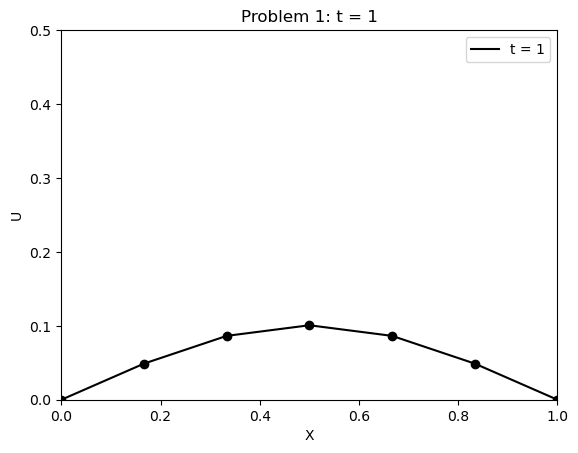

In [164]:
# Plot for t = 1
U_4 =  U_m[-1]
plt.plot(X, U_4, color = 'black', label = 't = 1')
plt.scatter(X, U_4, color = 'black')
plt.title('Problem 1: t = 1')
plt.xlim([0.0, 1.0])
plt.ylim([0, 0.5])
plt.xlabel('X')
plt.ylabel('U')
plt.legend()
plt.show()

# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method (1.1).
Use 140 subintervals in the $x$ dimension and 70 subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method (1.1) the CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.


In [165]:
# Define the constants and lambd
v = 1
k = 1/70
h = 24/140
n = 140
lambd = (v*k)/(h**2)

# Initalize U list
U_m = []

# Define linspaces for X and T
X = np.linspace(-12, 12, 141)
T = np.linspace(0,1,71)

# Define initial condition function
f2 = lambda x: max(1-x**2, 0)

# Define U_0
U_0 = np.array([f2(x) for x in X])

# Set diagonals for A
main_diagonal = [1] + [1-2*lambd for num in range(n-1)] + [1]
left_diagonal = [lambd for num in range(n-1)] + [0]
right_diagonal = [0] + [lambd for num in range(n-1)]
diagonals = [left_diagonal, main_diagonal, right_diagonal]
offsets = [-1,0,1]

# Make A and add U_0 to U_m
A = diags(diagonals, offsets, shape = (n+1, n+1))
U_m.append(U_0)

# Get all U's for all times
U_temp = U_0
for t in range(len(T-1)):
    U_temp = A @ U_temp
    U_m.append(U_temp)


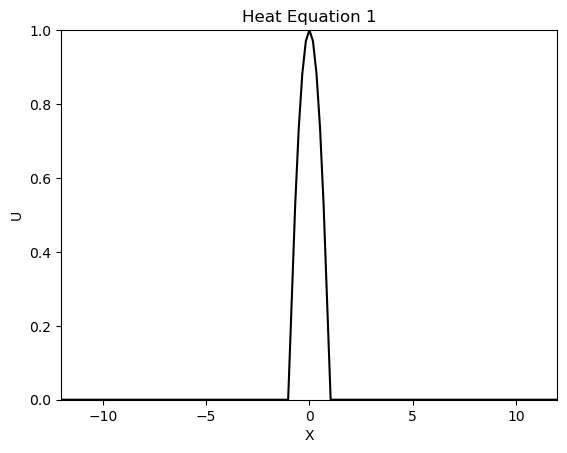

In [166]:
# Animation 1

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([-12,12])
plt.ylim([0,1])
plt.title("Heat Equation 1")
plt.xlabel('X')
plt.ylabel('U')

# Create line object
line, = ax.plot([], [], 'k-')

# Define update function
def update(t):
    line.set_data(X, U_m[t])
    return line

# Make Heat Equation 1 animation
ani_1 = FuncAnimation(fig, update, frames = range(0, len(U_m)), interval = 10)
ani_1.save('heat_equation1.mp4')


<video src = "heat_equation1.mp4" controls>

In [167]:
# Define constants
v = 1
k = 1/66
h = 24/140
n = 140
lambd = (v*k)/(h**2)

# Initialize U list
U_m = []

# Define linspaces for X and T
X = np.linspace(-12, 12, 141)
T = np.linspace(0,1,67)

# Define initial condition function
f2 = lambda x: max(1-x**2, 0)

# Define U_0
U_0 = np.array([f2(x) for x in X])

# Set diagonals for A
main_diagonal = [1] + [1-2*lambd for num in range(n-1)] + [1]
left_diagonal = [lambd for num in range(n-1)] + [0]
right_diagonal = [0] + [lambd for num in range(n-1)]
diagonals = [left_diagonal, main_diagonal, right_diagonal]
offsets = [-1,0,1]

# Make A and add U_0 to U_m
A = diags(diagonals, offsets, shape = (n+1, n+1))
U_m.append(U_0)

# Get all U's for all times
U_temp = U_0
for t in range(len(T-1)):
    U_temp = A @ U_temp
    U_m.append(U_temp)

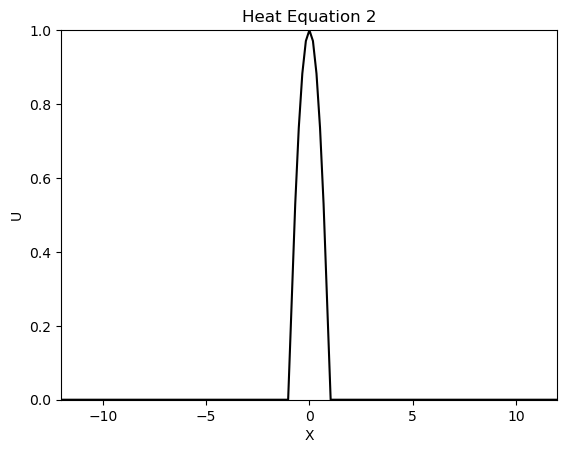

In [168]:
# Animation 2

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([-12,12])
plt.ylim([0,1])
plt.title("Heat Equation 2")
plt.xlabel('X')
plt.ylabel('U')

# Define empty line object
line, = ax.plot([], [], 'k-')

# Define update function
def update(t):
    line.set_data(X, U_m[t])
    return line

# Make Heat Equation 2 animation
ani_1 = FuncAnimation(fig, update, frames = range(0, len(U_m)), interval = 10)
ani_1.save('heat_equation2.mp4')

<video src = "heat_equation2.mp4" controls>

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem
\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}
Note that this is an implicit linear scheme; hence, the most efficient way to find $U^{j+1}$ is to create the matrix $B$ as a sparse matrix and then use \li{scipy.sparse.linalg.solve}.

Demonstrate that the numerical approximation at $t = 1$ converges.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in the lab.
The slope of the line there shows the order of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition, and we can safely use the same number of intervals in time and space.

In [169]:
def heat_cn(a, b, alpha, beta, f, nu, T, nx, nt):
    """Computes the Crank-Nicholson solution to the heat equation initial/boundary
    value problem:
    
        u_t = νu_xx, x∈[x0,x1] t∈[t0,t1]
        u(x0,t) = 0, u(x1,t) = 0
        u(x,0) = f(x)
        
        Parameters:
            a - left x boundary (float)
            b - right x boundary (float)
            alpha - left BC (float)
            beta - right BC (float)
            f - initial position (function)
            nu - heat diffusion coefficient (float)
            T - final time (float)
            nx - number of x steps (int)
            nt - number of time steps (int)
            
        Returns:
            U - approximate solution (ndarray(nt,nx))
            x - position array (ndarray(nx,))
    """
    
    # Define constants and initialize U_m
    v = nu
    k = 1/nt
    h = (b-a)/nx
    n = nx
    lambd = (v*k)/(2*h**2)
    U_m = []
    
    # Make linspaces for X and time
    X = np.linspace(a,b,n+1)
    Time = np.linspace(0,T, nt+1)
    
    # Make sparse matrix A
    A_main_diagonal = [1] + [1-2*lambd for num in range(n-1)] + [1]
    A_left_diagonal = [lambd for num in range(n-1)] + [0]
    A_right_diagonal = [0] + [lambd for num in range(n-1)]
    A_diagonals = [A_left_diagonal, A_main_diagonal, A_right_diagonal]
    A_offsets = [-1,0,1]
    A = diags(A_diagonals, A_offsets, shape = (n+1,n+1)).tocsc()
    
    # Make sparse matrix B
    B_main_diagonal = [1] + [1+2*lambd for num in range(n-1)] + [1]
    B_left_diagonal = [-lambd for num in range(n-1)] + [0]
    B_right_diagonal = [0] + [-lambd for num in range(n-1)]
    B_diagonals = [B_left_diagonal, B_main_diagonal, B_right_diagonal]
    B_offsets = [-1,0,1]
    B = diags(B_diagonals, B_offsets, shape = (n+1,n+1)).tocsc()
    
    # Get inverse of B
    B_inv = sp.linalg.inv(B)
    
    # Get U_0
    U_0 = np.array([f(x) for x in X])
    U_m.append(U_0)
    
    # Get the U array for all time values
    U_temp = U_0
    for t in range(len(Time)-1):
        U_temp = B_inv @ A @ U_temp
        U_m.append(U_temp)
        
    # Return all U arrays and X linspace
    return U_m, X
        
    
    
    
    
    
    
    

In [144]:
# "True" solution

# Define constants
a = -12
b = 12
alpha = 0 
beta = 0
f = lambda x: max(1 - x**2, 0)
nu = 1
T = 1
nx = 640
nt = 640

# Solve for "true" solution and get the "true" solution for t = 1
U, X = heat_cn(a, b, alpha, beta, f, nu, T, nx, nt)
U_true = U[-1]

# Initialize approximations lists and intervals sizes
U_approxs = []
steps  = [20,40,80,160,320]

# Loop through different values of steps
for step_size in steps:
    
    # Change x steps and t steps
    nx = step_size
    nt = step_size
    
    # Solve for approximate solution and get approximate solution for t = 1
    U, X = heat_cn(a, b, alpha, beta, f, nu, T, nx, nt)
    U_last = U[-1]
    U_approxs.append(U_last)

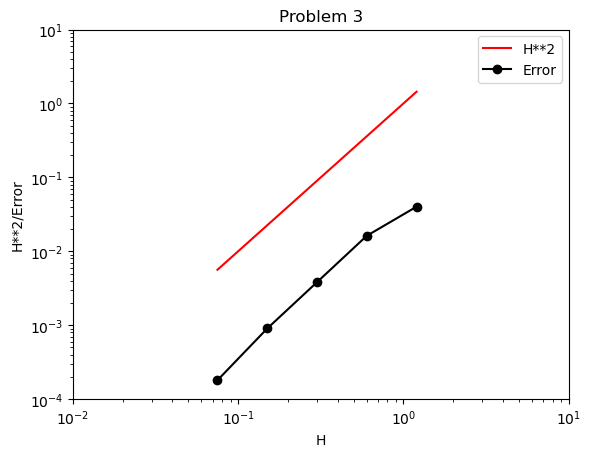

In [171]:
# Create errors array
errors = []

# Find max error for each step size
for i in range(len(U_approxs)):
    approximation = U_approxs[i]
    best = U_true[::2**(5-i)]
    error = np.max(np.abs(approximation - best))
    errors.append(error)


# Create H arrays
H = [(24/int) for int in steps]
H_Squared = [(24/int)**2 for int in steps]

# Plot data
plt.loglog(H, H_Squared, color = 'red', label = 'H**2')
plt.loglog(H, errors, 'k-', marker = 'o', label = 'Error')
plt.xlim(1/100, 10)
plt.ylim(1/10000, 10)
plt.xlabel('H')
plt.ylabel('H**2/Error')
plt.title('Problem 3')
plt.legend()
plt.show()